In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(1460, 81)

In [6]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature'], axis=1, inplace=True)

df.drop(['Id', 'LotFrontage'], axis=1, inplace=True)

In [7]:
df.shape

(1460, 74)

In [8]:
df = df.dropna()

In [9]:
df.shape

(1338, 74)

In [10]:
def encode(df):
    labelEnc = LabelEncoder()
    for c in df.columns:
        if df[c].dtypes == 'object':
            df[c] = labelEnc.fit_transform(df[c])
    return df


df1 = encode(df)
df1.head()

C:\Users\Udit Amin\AppData\Local\Temp\ipykernel_21920\3658799670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = labelEnc.fit_transform(df[c])


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


In [11]:
def costFunc(x, y, theta, b):
    m = len(y)
    y_pred = x.dot(theta) + b
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

In [12]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,1,3,3,0,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,1,3,3,0,4,0,12,...,112,0,0,0,0,4,2010,8,4,142125


In [13]:
y = df['SalePrice']
x = df.drop(['SalePrice'], axis=1)

In [14]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [15]:
X_train,X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.3)

In [16]:
theta = np.zeros(X_train.shape[1])

In [17]:
costFunc(X_train,Y_train, theta, 0)

20612233540.926285

In [18]:
def GradientDescent(x, y, theta, b, alpha, epochs):
    cost_list = []

    for epoch in range(epochs):
        loss = x.dot(theta) + b - y

        dw = x.T.dot(loss) / len(y)
        db = np.sum(loss) / len(y)

        theta = theta - alpha*dw
        b = b - alpha*db

        cost = costFunc(x, y, theta, b)
        cost_list.append(cost)

        if (epoch % 100 == 0):
            print(f"epoch {epoch}: Cost = {cost}")

    return theta, b, cost_list


In [19]:
newTheta, b, costs = GradientDescent(X_train, Y_train, theta, b=0, alpha=0.009, epochs=2000)

epoch 0: Cost = 19846066910.254093
epoch 100: Cost = 3346359138.2080297
epoch 200: Cost = 1025559817.5999975
epoch 300: Cost = 632826021.6412139
epoch 400: Cost = 561738929.396521
epoch 500: Cost = 546844998.7859231
epoch 600: Cost = 542652697.7541938
epoch 700: Cost = 540894027.470372
epoch 800: Cost = 539884313.1063251
epoch 900: Cost = 539199018.2145646
epoch 1000: Cost = 538693683.7186837
epoch 1100: Cost = 538303149.5705532
epoch 1200: Cost = 537992000.5651743
epoch 1300: Cost = 537738768.505764
epoch 1400: Cost = 537529489.4125235
epoch 1500: Cost = 537354585.5565459
epoch 1600: Cost = 537207195.072863
epoch 1700: Cost = 537082218.6679233
epoch 1800: Cost = 536975749.8085011
epoch 1900: Cost = 536884720.4320966


In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

Text(0, 0.5, 'Cost')

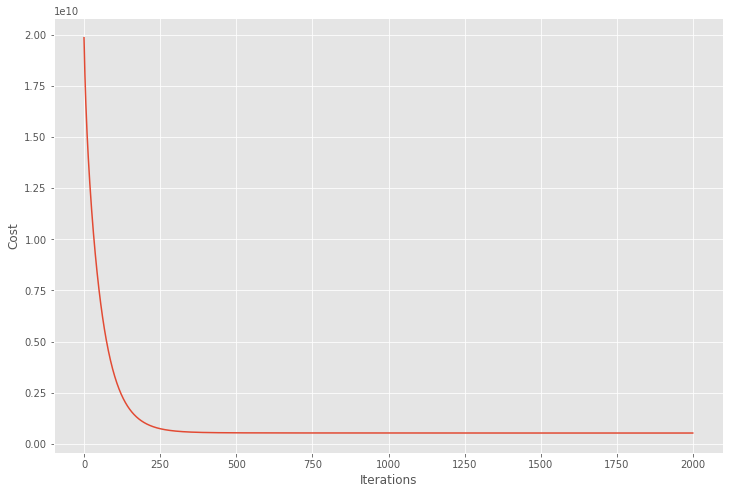

In [21]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [22]:
def predict(X, w, b):
    return X.dot(w) + b


y_pred = predict(X_test, newTheta, b)

In [23]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

r2(y_pred,Y_test)

0.8432086073805585